**Nama : Winda Ayu Melati** <br>
**Nim  : 211351150** <br>
**Kelas : Teknik Informatika - Pagi A**

#**Import Dataset Kaggle**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"windaayumelati","key":"03748c9e298dbec2b99f164a2b651ba9"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d elakiricoder/gender-classification-dataset

  0% 0.00/19.0k [00:00<?, ?B/s]
100% 19.0k/19.0k [00:00<00:00, 27.7MB/s]


In [4]:
!mkdir gender-classification-dataset
!unzip gender-classification-dataset.zip -d gender-classification-dataset
!ls gender-classification-dataset

Archive:  gender-classification-dataset.zip
  inflating: gender-classification-dataset/gender_classification_v7.csv  
gender_classification_v7.csv


#**Import Library Yang Dibutuhkan**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import statistics

#**Data Discovery**

In [6]:
df = pd.read_csv("gender-classification-dataset/gender_classification_v7.csv")
df.sample()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
3954,1,15.5,5.6,1,1,1,1,Male


In [7]:
df.shape

(5001, 8)

In [8]:
# Mengecek duplikat keseluruhan pada DataFrame
overall_duplicates = df[df.duplicated()]
print("Duplikat Keseluruhan:")
print(overall_duplicates)

Duplikat Keseluruhan:
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
59            1               14.1                 5.9          0          0   
66            1               14.2                 6.2          0          0   
175           1               12.7                 5.7          1          1   
230           1               12.9                 5.1          0          0   
261           1               13.0                 6.2          1          1   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  

In [9]:
# Menghapus duplikat dan mengganti DataFrame yang ada
df.drop_duplicates(inplace=True)

# Menampilkan DataFrame setelah menghapus duplikat
print("DataFrame setelah menghapus duplikat:")
print(df)


DataFrame setelah menghapus duplikat:
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4986          1               11.7                 6.1          1          1   
4990          1               12.6                 5.7          0          0   
4992          1               14.1                 7.0          1          1   
4993          1               11.6                 5.9          0          0   
4995          1               12.3                 6.9          0          1   

 

In [10]:
df = df.reset_index(drop=True)  # Mereset indeks dan menghapus indeks lama

In [11]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 202.2+ KB


In [13]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [15]:
df['gender'].value_counts()

Male      1783
Female    1450
Name: gender, dtype: int64

In [16]:
df['forehead_width_cm'].unique()

array([11.8, 14. , 14.4, 13.5, 13. , 15.3, 11.9, 12.1, 12.5, 15.5, 14.7,
       14.5, 14.2, 15.2, 14.6, 12.8, 12.9, 12.2, 12.3, 12.7, 14.1, 11.5,
       13.8, 13.7, 12. , 11.4, 15.4, 13.3, 13.2, 14.3, 13.9, 11.7, 15.1,
       15. , 12.4, 11.6, 12.6, 14.8, 13.1, 13.4, 13.6, 14.9])

In [17]:
max_value = df['forehead_width_cm'].max()
min_value = df['forehead_width_cm'].min()

print(f'Nilai maksimum forehead_width_cm: {max_value}')
print(f'Nilai minimum forehead_width_cm: {min_value}')

Nilai maksimum forehead_width_cm: 15.5
Nilai minimum forehead_width_cm: 11.4


In [18]:
df['forehead_height_cm'].unique()

array([6.1, 5.4, 6.3, 5.9, 6.8, 6.2, 5.2, 5.8, 6.7, 6.5, 6. , 5.6, 7. ,
       6.4, 5.3, 5.7, 5.1, 5.5, 7.1, 6.6, 6.9])

In [19]:
max_value = df['forehead_height_cm'].max()
min_value = df['forehead_height_cm'].min()

print(f'Nilai maksimum forehead_height_cm: {max_value}')
print(f'Nilai minimum forehead_height_cm: {min_value}')

Nilai maksimum forehead_height_cm: 7.1
Nilai minimum forehead_height_cm: 5.1


In [20]:
df.iloc[:,[0]].value_counts()

long_hair
1            2659
0             574
dtype: int64

In [21]:
df.iloc[:,[1]].value_counts()

forehead_width_cm
11.9                 100
12.6                  99
14.1                  98
11.8                  98
12.5                  97
13.2                  97
13.5                  95
13.6                  95
14.2                  95
12.0                  95
11.6                  95
12.1                  95
13.3                  93
11.5                  93
12.8                  92
14.0                  91
12.2                  91
13.7                  90
13.8                  89
13.4                  87
13.9                  87
13.1                  85
12.7                  85
12.9                  84
13.0                  83
12.3                  83
14.3                  81
12.4                  81
11.7                  81
11.4                  53
14.9                  51
15.5                  49
15.4                  48
14.5                  47
15.3                  46
14.4                  45
15.1                  45
15.2                  45
14.6                  44
14.8   

In [22]:
df.iloc[:,[2]].value_counts()

forehead_height_cm
6.3                   195
5.8                   193
6.4                   192
5.5                   190
5.9                   189
5.1                   187
6.2                   186
5.3                   185
6.0                   183
6.5                   180
5.6                   180
5.7                   176
6.1                   175
5.4                   174
5.2                   159
6.8                    88
7.1                    85
6.6                    84
7.0                    84
6.9                    75
6.7                    73
dtype: int64

In [23]:
df.iloc[:,[3]].value_counts()

nose_wide
1            1734
0            1499
dtype: int64

In [24]:
df.iloc[:,[4]].value_counts()

nose_long
1            1803
0            1430
dtype: int64

In [25]:
df.iloc[:,[5]].value_counts()

lips_thin
1            1741
0            1492
dtype: int64

In [26]:
df.iloc[:,[6]].value_counts()

distance_nose_to_lip_long
1                            1763
0                            1470
dtype: int64

In [27]:
df.iloc[:,[7]].value_counts()

gender
Male      1783
Female    1450
dtype: int64

In [28]:
df.skew()

<ipython-input-28-9e0b1e29546f>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



long_hair                   -1.688467
forehead_width_cm            0.226676
forehead_height_cm           0.225240
nose_wide                   -0.145829
nose_long                   -0.232404
lips_thin                   -0.154567
distance_nose_to_lip_long   -0.182089
dtype: float64

#**EDA**

<ipython-input-29-97cdbf7f1862>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

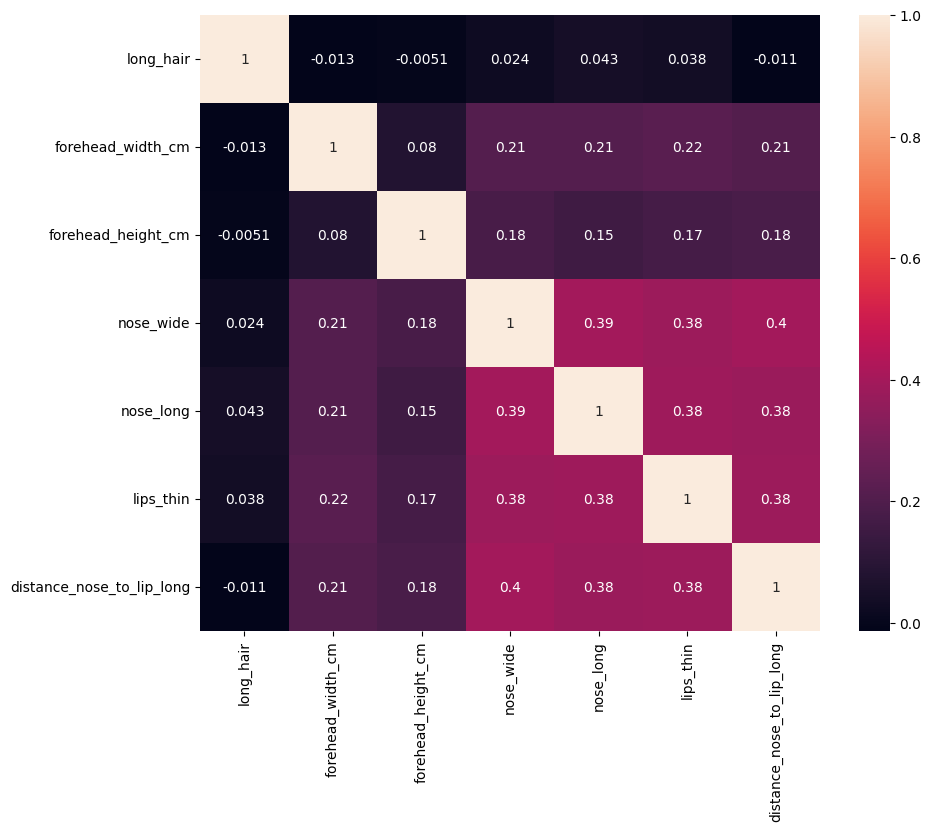

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [30]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Countplot', 'Percentages'),
                    specs=[[{"type": "xy"}, {'type':'domain'}]])

# Bar Plot
fig.add_trace(go.Bar(y=df['long_hair'].value_counts().values.tolist(),
                     x=['1', '0'],
                     text=df['long_hair'].value_counts().values.tolist(),
                     textfont=dict(size=15),
                     textposition='outside',
                     showlegend=False,
                     marker=dict(color=colors, line_color='black', line_width=3),
                     hoverinfo='text'), row=1, col=1)

# Pie Chart
fig.add_trace(go.Pie(labels=['Long Hair', 'Not Long Hair'],
                     values=df['long_hair'].value_counts().values,
                     textfont=dict(size=16),
                     hole=0.4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label'), row=1, col=2)

fig.update_yaxes(range=[0, 800])

# Mengubah latar belakang plot dan figure serta ukuran gambar
fig.update_layout(
    paper_bgcolor='#FFFDE7',
    plot_bgcolor='#FFFDE7',
    title=dict(text="Long Hair Distribution", x=0.5, y=0.95),
    title_font_size=30,
    height=500,  # Sesuaikan dengan ukuran yang diinginkan
    width=1000    # Sesuaikan dengan ukuran yang diinginkan
)

# Mengganti label pada sumbu x
fig.update_xaxes(title_text="Long Hair", ticktext=['Not Long Hair', 'Long Hair'], tickvals=[0, 1], row=1, col=1)

# Menampilkan plot
iplot(fig)


In [31]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Countplot', 'Percentages'),
                    specs=[[{"type": "xy"}, {'type':'domain'}]])

# Bar Plot
fig.add_trace(go.Bar(y=df['nose_wide'].value_counts().values.tolist(),
                     x=['0', '1'],
                     text=df['nose_wide'].value_counts().values.tolist(),
                     textfont=dict(size=15),
                     textposition='outside',
                     showlegend=False,
                     marker=dict(color=colors, line_color='black', line_width=3),
                     hoverinfo='text'), row=1, col=1)

# Pie Chart
fig.add_trace(go.Pie(labels=['Not wide nose', 'Wide nose'],
                     values=df['nose_wide'].value_counts().values,
                     textfont=dict(size=16),
                     hole=0.4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label'), row=1, col=2)

fig.update_yaxes(range=[0, 800])

# Mengubah latar belakang plot dan figure
fig.update_layout(
    paper_bgcolor='#FFFDE7',
    plot_bgcolor='#FFFDE7',
    title=dict(text="Wide Nose Distribution", x=0.5, y=0.95),
    title_font_size=30,
    height=400,  # Sesuaikan dengan ukuran yang diinginkan
    width=800    # Sesuaikan dengan ukuran yang diinginkan
)

# Mengganti label pada sumbu x
fig.update_xaxes(title_text="Wide Nose", ticktext=['Not Wide Nose', 'Wide Nose'], tickvals=[0, 1], row=1, col=1)

# Menampilkan plot
iplot(fig)


In [32]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Countplot', 'Percentages'),
                    specs=[[{"type": "xy"}, {'type':'domain'}]])

# Bar Plot
fig.add_trace(go.Bar(y=df['gender'].value_counts().values.tolist(),
                     x=['Female', 'Male'],
                     text=df['gender'].value_counts().values.tolist(),
                     textfont=dict(size=15),
                     textposition='outside',
                     showlegend=False,
                     marker=dict(color=colors, line_color='black', line_width=3),
                     hoverinfo='text'), row=1, col=1)

# Pie Chart
fig.add_trace(go.Pie(labels=['Female','Male'],
                     values=df['gender'].value_counts().values,
                     textfont=dict(size=16),
                     hole=0.4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label'), row=1, col=2)

fig.update_yaxes(range=[0, 600])

# Mengubah latar belakang plot dan figure
fig.update_layout(
    paper_bgcolor='#FFFDE7',
    plot_bgcolor='#FFFDE7',
    title=dict(text="Gender Distribution", x=0.5, y=0.95),
    title_font_size=30,
    height=400,  # Sesuaikan dengan ukuran yang diinginkan
    width=800    # Sesuaikan dengan ukuran yang diinginkan
)

# Mengganti label pada sumbu x bar plot
fig.update_xaxes(title_text="Gender", ticktext=['Female','Male'], tickvals=[0, 1, 2], row=1, col=1)

# Menampilkan plot
iplot(fig)


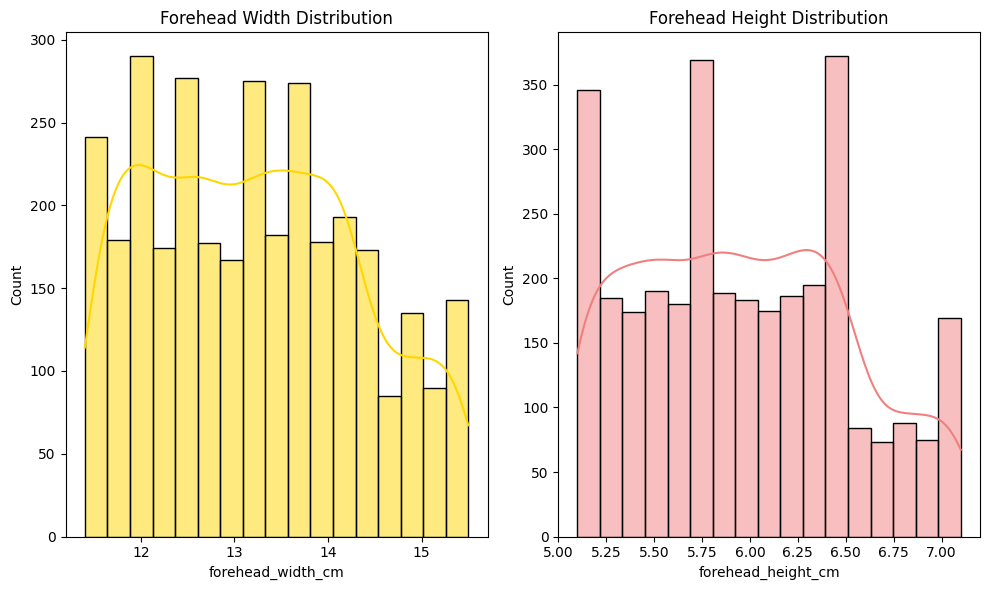

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot Forehead Width Distribution
sns.histplot(df['forehead_width_cm'], kde=True, ax=axes[0], color='gold')
axes[0].set_title('Forehead Width Distribution')

# Plot Forehead Height Distribution
sns.histplot(df['forehead_height_cm'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Forehead Height Distribution')

plt.tight_layout()
plt.show()

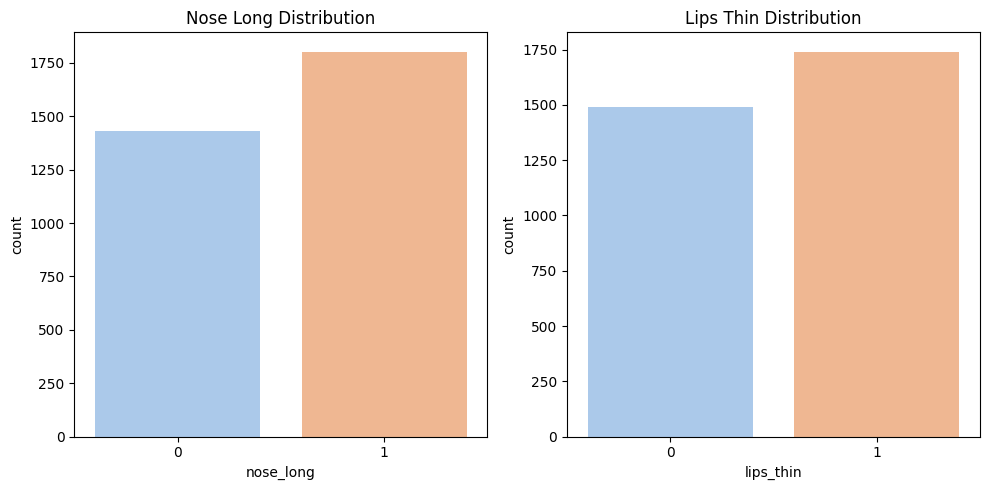

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Nose Long Distribution
sns.countplot(x='nose_long', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Nose Long Distribution')

# Plot Lips Thin Distribution
sns.countplot(x='lips_thin', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Lips Thin Distribution')

plt.tight_layout()
plt.show()


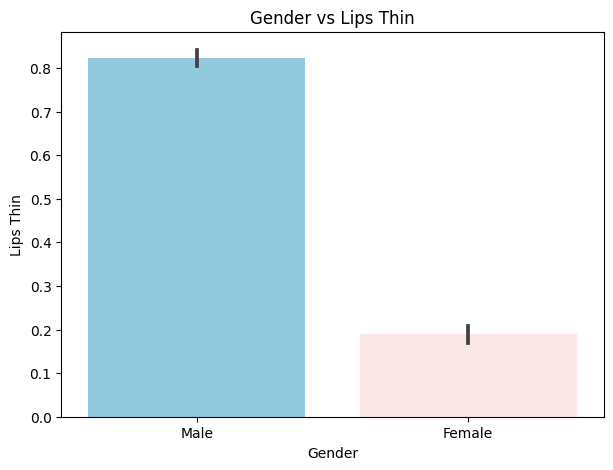

In [35]:
plt.figure(figsize=(7,5))
sns.barplot(x='gender',y='lips_thin',data=df, palette=['skyblue', 'mistyrose'])
plt.title('Gender vs Lips Thin')
plt.xlabel('Gender')
plt.ylabel('Lips Thin')
plt.show()

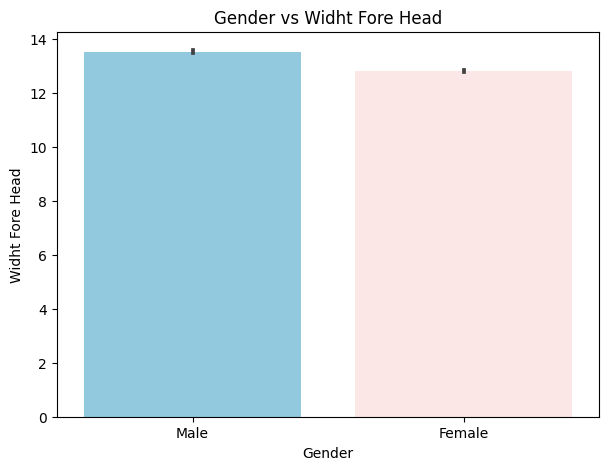

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(x='gender',y='forehead_width_cm',data=df, palette=['skyblue', 'mistyrose'])
plt.title('Gender vs Widht Fore Head')
plt.xlabel('Gender')
plt.ylabel('Widht Fore Head')
plt.show()

# **Data Preparation**

In [37]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [38]:
numerical

['long_hair',
 'forehead_width_cm',
 'forehead_height_cm',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long']

In [39]:
 catgcols

['gender']

In [40]:
ind_col = [col for col in df.columns if col != 'gender']
dep_col = 'gender'

In [41]:
df.shape

(3233, 8)

In [42]:
x = df.drop(columns='gender', axis=1)
y = df['gender']

In [43]:
print(x)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
3228          1               11.7                 6.1          1          1   
3229          1               12.6                 5.7          0          0   
3230          1               14.1                 7.0          1          1   
3231          1               11.6                 5.9          0          0   
3232          1               12.3                 6.9          0          1   

      lips_thin  distance_nose_to_lip_l

In [44]:
print(y)

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
3228      Male
3229    Female
3230      Male
3231    Female
3232      Male
Name: gender, Length: 3233, dtype: object


In [45]:
features = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',	'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
x = df[features]
y = df['gender']
print(x.shape)
print(y.shape)

(3233, 7)
(3233,)


#**Modeling**

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)
y_test.shape
x_train.shape

(2586, 7)

In [47]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [48]:
# Print accuracy for the testing set
test_score = model.score(x_test, y_test)
print('Testing Accuracy (k-NN):', test_score)

# Print accuracy for the training set
train_score = model.score(x_train, y_train)
print('Training Accuracy (k-NN):', train_score)

Testing Accuracy (k-NN): 0.9412673879443586
Training Accuracy (k-NN): 0.9729311678267595


In [49]:
param_grid = {'n_neighbors':np.arange(1,5)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9508180169489092
Best Parameters: {'n_neighbors': 4}


##Simulasi Data

In [50]:
input_data = np.array([[1, 11.8, 6.1, 1, 0, 1, 1]])
prediction = model.predict(input_data)
print('Prediksi Gender = ', prediction)

Prediksi Gender =  ['Male']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



#Evaluasi Akhir

In [51]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['gender'], margins=True, margins_name="Total")

gender,Female,Male,Total
True,,,
Female,294,14,308
Male,24,315,339
Total,318,329,647


In [52]:
print(confusion_matrix(y_test, y_pred))

[[294  14]
 [ 24 315]]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.92      0.95      0.94       308
        Male       0.96      0.93      0.94       339

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647



In [54]:
cv_scores = cross_val_score(knn, x, y, cv=5)
print(cv_scores)
print("\n average 5 fold tree : {}".format(np.mean(cv_scores)))

[0.95517774 0.94899536 0.94126739 0.95975232 0.93343653]

 average 5 fold tree : 0.9477258698159163


In [55]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_proba=knn.predict_proba(x_test)[:,1]

print("\n ROC AUC Score knn : {}".format(roc_auc_score(y_test, y_pred_proba)))
print("\n accuracy score : {}".format(accuracy_score(y_test,y_pred)))


 ROC AUC Score knn : 0.9829856721449641

 accuracy score : 0.9489953632148377


#**Visualisasi Hasil Modeling dan Evaluasi Akhir**

Text(0.5, 23.52222222222222, 'Predicted label')

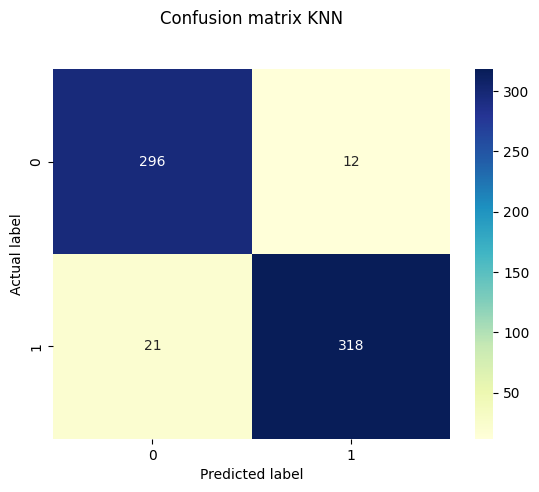

In [56]:
y_pred = knn.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,5)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(x_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)


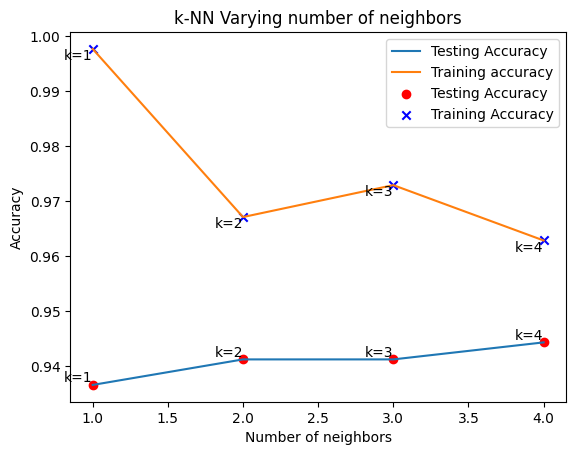

Neighbors: 1, Testing Accuracy: 0.9366, Training Accuracy: 0.9977
Neighbors: 2, Testing Accuracy: 0.9413, Training Accuracy: 0.9671
Neighbors: 3, Testing Accuracy: 0.9413, Training Accuracy: 0.9729
Neighbors: 4, Testing Accuracy: 0.9444, Training Accuracy: 0.9629


In [58]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

# Annotate each point with its corresponding k value
for neighbor, test_acc, train_acc in zip(neighbors, test_accuracy, train_accuracy):
    plt.text(neighbor, test_acc, f'k={neighbor}', ha='right', va='bottom')
    plt.text(neighbor, train_acc, f'k={neighbor}', ha='right', va='top')

# Add scatter points for emphasis
plt.scatter(neighbors, test_accuracy, color='red', marker='o', label='Testing Accuracy')
plt.scatter(neighbors, train_accuracy, color='blue', marker='x', label='Training Accuracy')

plt.legend()
plt.show()

# Print the accuracy values
for neighbor, test_acc, train_acc in zip(neighbors, test_accuracy, train_accuracy):
    print(f"Neighbors: {neighbor}, Testing Accuracy: {test_acc:.4f}, Training Accuracy: {train_acc:.4f}")

K = 1, Accuracy = 0.9366
K = 2, Accuracy = 0.9413
K = 3, Accuracy = 0.9413
K = 4, Accuracy = 0.9444


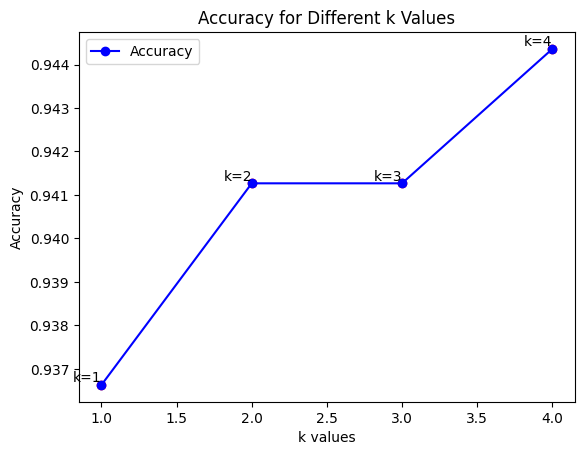

In [59]:
score_list = []
for k in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    score_list.append(score)
    print(f"K = {k}, Accuracy = {score:.4f}")

# Plot the accuracy for different k values
plt.plot(range(1, 5), score_list, marker='o', linestyle='-', color='b', label='Accuracy')
plt.scatter(range(1, 5), score_list, color='red')  # Add red points for emphasis
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different k Values")

# Annotate each point with its corresponding k value
for k, score in zip(range(1, 5), score_list):
    plt.text(k, score, f'k={k}', ha='right', va='bottom')

plt.legend()
plt.show()

In [60]:
error_rate= []
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [61]:
for k, error in zip(range(1, 5), error_rate):
    print(f"K = {k}, Error Rate = {error:.4f}")

plt.show()

K = 1, Error Rate = 0.0634
K = 2, Error Rate = 0.0587
K = 3, Error Rate = 0.0587
K = 4, Error Rate = 0.0556


Text(0, 0.5, 'Error Rate')

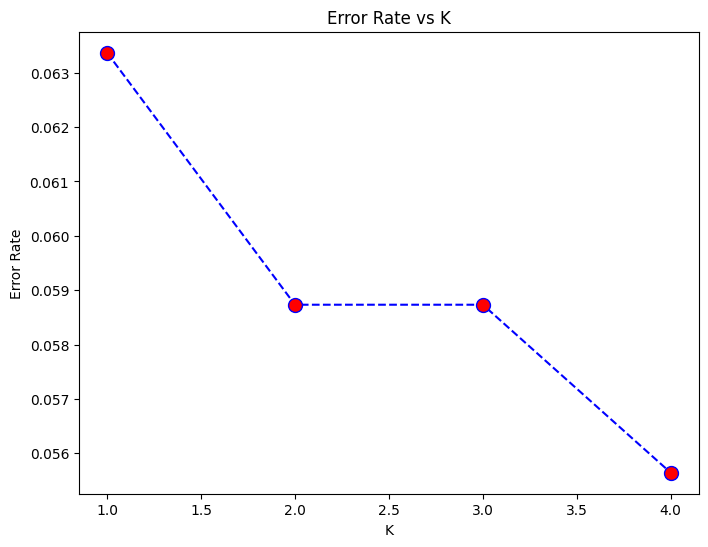

In [62]:
plt.figure(figsize = (8,6))
plt.plot(range(1,5),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



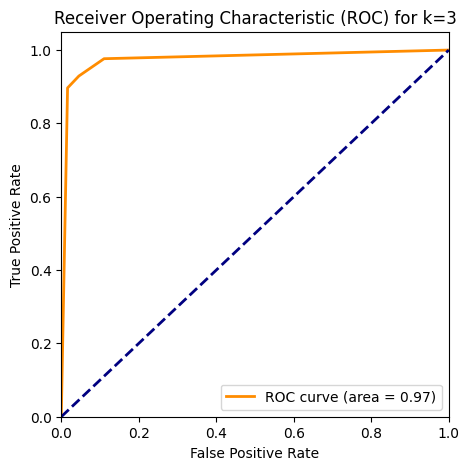

AUC for k=3: 0.9749


In [63]:
# Convert categorical labels to binary format
label_binarizer = LabelBinarizer()
y_train_bin = label_binarizer.fit_transform(y_train)
y_test_bin = label_binarizer.transform(y_test)

# Create and train the KNN model for k=8
k_value = 3
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(x_train, y_train_bin)

# Make predictions on the testing set
y_pred_proba = knn.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for k=3
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for k=3')
plt.legend(loc="lower right")
plt.show()

# Print AUC value for k=8
print(f"AUC for k=3: {roc_auc:.4f}")


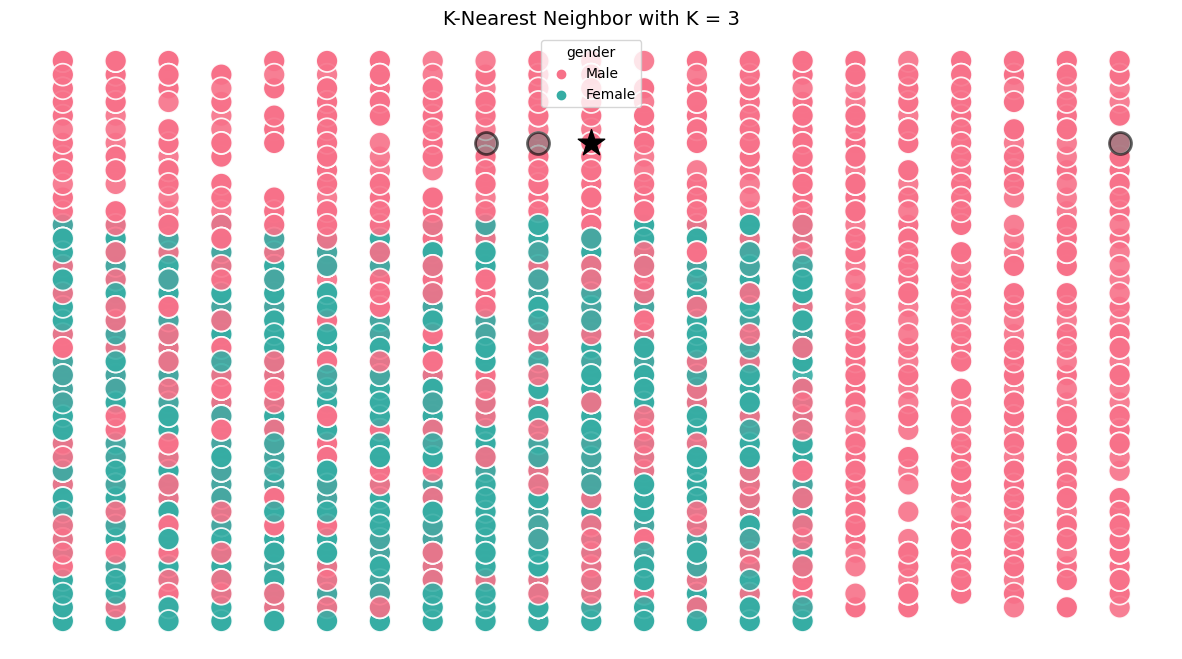

Predictions: Male


In [64]:
def knn_algorithm(k, x1, x2):
    euclidean_distance = []

    for i in range(df.shape[0]):
        euclidean_distance.append(np.sqrt(np.dot(df.iloc[i].values[:2] - [x1, x2], df.iloc[i].values[:2] - [x1, x2])))

    index = np.argsort(euclidean_distance)
    index = index[:k]
    label = [df.gender[i] for i in index]
    label = statistics.mode(label)

    palette = sns.color_palette("husl", 2)
    colors = {0: palette[0], 1: palette[1]}

    fig = plt.figure(figsize=(15, 8))
    sns.scatterplot(data=df, x='forehead_height_cm', y='forehead_width_cm', hue='gender',
                    alpha=0.9, s=250, palette=palette)

    for i in index:
        target_value = df.iloc[i].values[-1]
        if isinstance(target_value, (int, float)):  # Check if the target value is numeric
            color = colors[target_value]
        else:
            color = 'gray'  # Assign a specific color for non-numeric values
        plt.scatter(x=df['forehead_height_cm'][i], y=df['forehead_width_cm'][i], s=250, alpha=0.6, linewidth=2, edgecolor='k', color=color)

    plt.scatter(x=x1, y=x2, s=400, marker='*', color='k')
    plt.title(label=f'K-Nearest Neighbor with K = {k}', fontsize=14)
    ax = fig.get_axes()[0]
    ax.set_axis_off()
    plt.show()

    return f'Predictions: {label}'

k_value = 3
x1_value = 6.1
x2_value = 14.9

result = knn_algorithm(k_value, x1_value, x2_value)
print(result)

#**Simpan Model**

In [65]:
import pickle

filename = 'GenderPrediction.sav'
pickle.dump(knn,open(filename,'wb'))

In [66]:
df.to_csv('GenderPrediction.csv',index=False)